In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("titanic.csv")
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
156,157,1,3,"Gilnagh, Miss. Katherine ""Katie""",female,16.00,0,0,35851,7.7333,NaN,Q
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.00,0,1,248727,33.0000,NaN,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C
761,762,0,3,"Nirva, Mr. Iisakki Antino Aijo",male,41.00,0,0,SOTON/O2 3101272,7.1250,NaN,S
771,772,0,3,"Jensen, Mr. Niels Peder",male,48.00,0,0,350047,7.8542,NaN,S
102,103,0,1,"White, Mr. Richard Frasar",male,21.00,0,1,35281,77.2875,D26,S
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.00,0,0,PC 17590,50.4958,A24,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.00,0,0,348121,7.6500,F G63,S


In [3]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.shape

(891, 12)

In [6]:
df.drop(columns=['Cabin'],inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [8]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [9]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [10]:
df['Embarked'].fillna('S',inplace=True)

In [11]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

<Axes: xlabel='Sex', ylabel='count'>

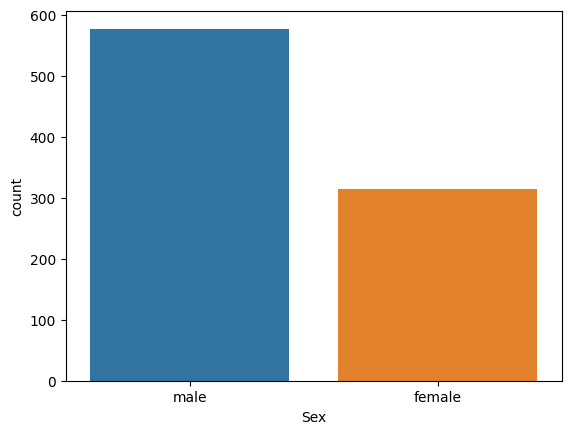

In [12]:
sns.countplot(x = 'Sex',data = df)

<Axes: xlabel='Embarked', ylabel='count'>

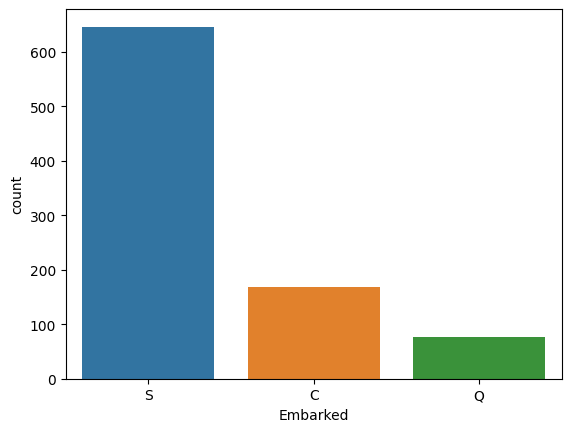

In [13]:
sns.countplot(x="Embarked", data=df)

<Axes: xlabel='Pclass', ylabel='Fare'>

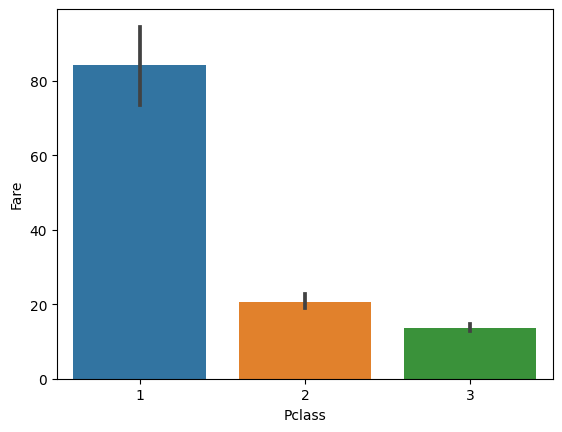

In [19]:
sns.barplot(x='Pclass',y='Fare',data=df)

In [26]:
df2=df.drop(columns=['PassengerId',"Name",'Ticket'])
from sklearn.preprocessing import LabelEncoder

l=LabelEncoder()
df2['Sex']=l.fit_transform(df2['Sex'])
df2['Embarked']=l.fit_transform(df2['Embarked'])

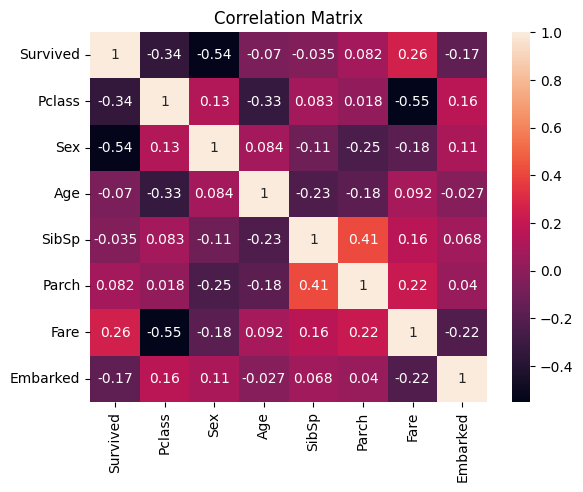

In [27]:
sns.heatmap(df2.corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

survival rate highly dependent on pclass and sex

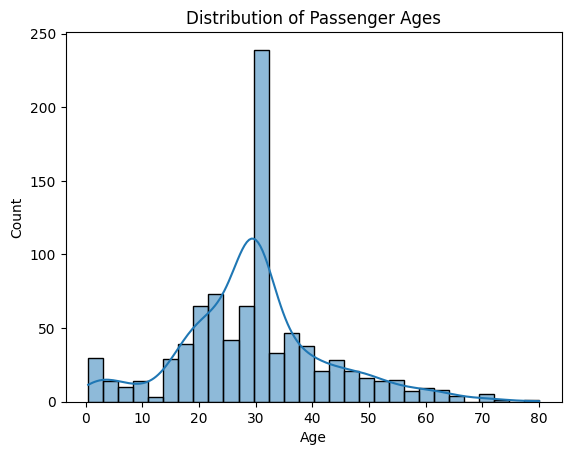

In [28]:
# Plot the distribution of passenger ages
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Passenger Ages')
plt.show()


In the example code provided, when plotting the distribution of passenger ages with the KDE parameter set to True, the KDE curve shows the estimated density of passenger ages. Higher peaks in the KDE curve indicate higher density or a higher probability of observing ages around that value.

KDE plots are useful for visualizing the shape and distribution of continuous data, as they provide a smooth estimate of the underlying distribution and can reveal patterns, peaks, or modes in the data.

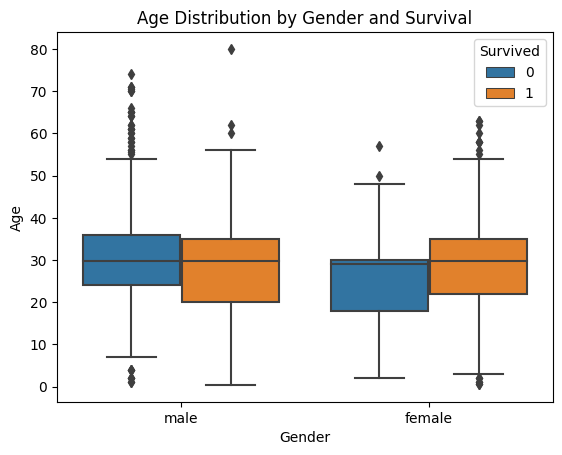

In [31]:
# Plot box plot of age distribution with respect to gender and survival
sns.boxplot(x='Sex', y='Age', hue='Survived', data=df)
plt.title('Age Distribution by Gender and Survival')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

The box plot for the distribution of age with respect to each gender, along with the information about survival, provides several insights and inferences:

Age Distribution: The box plot visually represents the distribution of ages for males and females separately. It shows the range of ages covered, as well as the median (line in the middle of the box) and quartiles (edges of the box). The whiskers extend to the minimum and maximum values within 1.5 times the interquartile range (IQR).

Gender Differences: By comparing the box plots for males and females, we can observe any differences in the age distribution. For example, we can determine if one gender tends to have a wider or narrower age range or if there are differences in the median age.

Outliers: The box plot helps identify any outliers in the age distribution. Outliers are data points that fall significantly outside the whiskers, indicating potential extreme values or anomalies in the dataset.

Survival Comparison: The box plot further differentiates the age distribution based on survival status. By comparing the boxes and whiskers for the survived and not survived categories within each gender, we can assess if there are any differences in the age distribution between survivors and non-survivors within each gender group.

In [32]:
df["Age"].value_counts()

Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

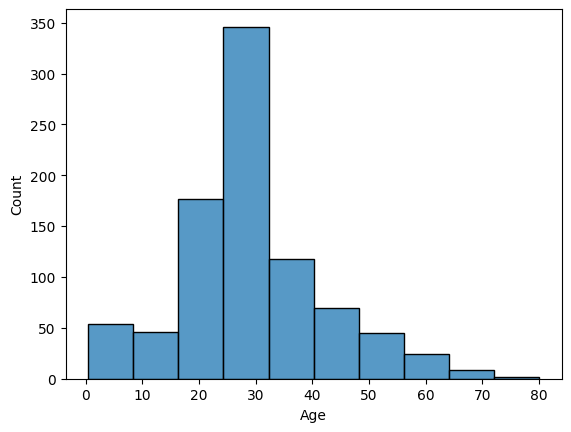

In [40]:
sns.histplot(x = 'Age',data = df, bins = 10)

<Axes: xlabel='Survived', ylabel='Fare'>

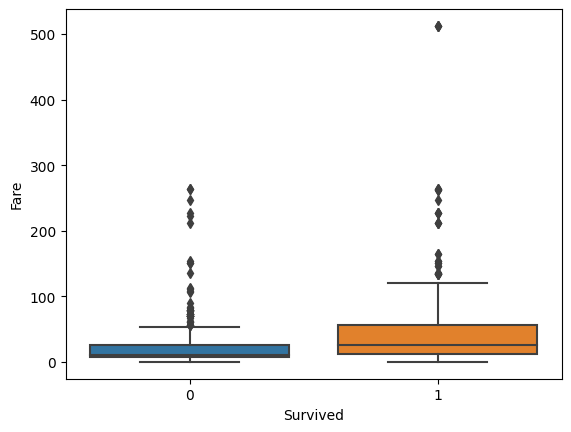

In [37]:
sns.boxplot(x='Survived', y='Fare',data=df)

more fare survival chances are high

<Axes: xlabel='Pclass', ylabel='Age'>

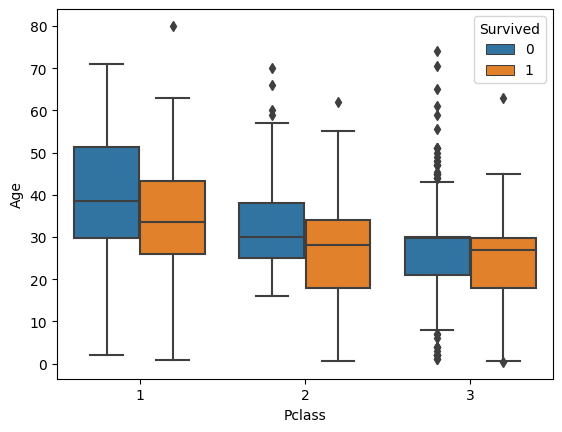

In [39]:
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=df)

Aged persons in 1st class while youngsters in third class and in every class the median age of survived members is smaller

